# EDA & Classification on Telecom Customer Churn

This data can be download from https://www.kaggle.com/blastchar/telco-customer-churn.

This date contains the following 21 features:
    1. customerID: Customer ID
    2. gender: Whether the customer is a male or a female
    3. Senior Citizen: Whether the customer is a senior citizen or not (1, 0)
    4. Partner: Whether the customer has a partner or not (Yes, No)
    5. Dependents: Whether the customer has dependents or not (Yes, No)
    6. tenure: Number of months the customer has stayed with the company
    7. Phone Service: Whether the customer has a phone service or not (Yes, No)
    8. Multiple Lines: Whether the customer has multiple lines or not (Yes, No, No phone service)
    9. Internet Service: Customer’s internet service provider (DSL, Fiber optic, No)
    10. Online Security: Whether the customer has online security or not (Yes, No, No internet service)
    11. Online Backup: Whether the customer has online backup or not (Yes, No, No internet service)
    12. Device Protection: Whether the customer has device protection or not (Yes, No, No internet service)
    13. Tech Support: Whether the customer has tech support or not (Yes, No, No internet service)
    14. Streaming TV: Whether the customer has streaming TV or not (Yes, No, No internet service)
    15. Streaming Movies: Whether the customer has streaming movies or not (Yes, No, No internet service)
    16. Contract: The contract term of the customer (Month-to-month, One year, Two year)
    17. Paperless Billing: Whether the customer has paperless billing or not (Yes, No)
    18. Payment Method: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
    19. Monthly Charges: The amount charged to the customer monthly
    20. Total Charges: The total amount charged to the customer
    21. Churn: Whether the customer churned or not (Yes or No)

In this project, I will focus on the following steps:  
    1. EDA: explora the relationship between Churn and the following three sections:
        1). Churn VS Demograohic info (gender, Senior Citizen, partners and dependents)
        2). Churn VS Service (phone Service, multiple lines, internet Service, online security, online backup, device protection, tech support, and streaming TV and movies)
        3). Churn VS Customer account information (how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges) 
    2. Classification: SVM, RF, Decision Tree, NaiveBayes and logisit Regression

In [1]:
#import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder

C:\Users\candy\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
#upload data
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df=pd.DataFrame(data)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
#Change TotalCharges into numerica
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

The missing values only exists in TotalCharges, and it's not too much. Maybe we can use median to impute later in order to fit the model.

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
#Check if there are any duplicates
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


No     5174
Yes    1869
Name: Churn, dtype: int64


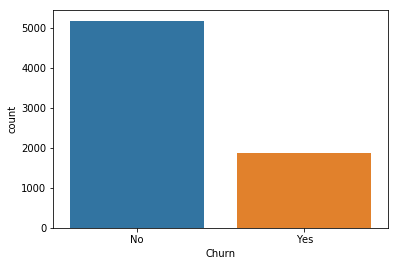

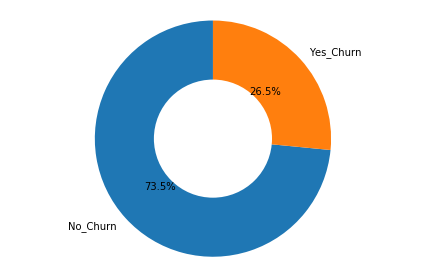

In [9]:
#EDA
#Check the target first
print(df['Churn'].value_counts())
sns.countplot(df['Churn'])

# Pie chart
N_C=df[df['Churn']=='No'].shape[0]
Y_C=df[df['Churn']=='Yes'].shape[0]
size=[N_C,Y_C]
 
fig1, ax1 = plt.subplots()
ax1.pie(size, labels=['No_Churn','Yes_Churn'], autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()

It is obvious that more than 2/3 customers will keep the contact. Next, I will explore the relationship between Churn and other features.

#1. Churn VS Demograohic info (gender, Senior Citizen, partners and dependents)

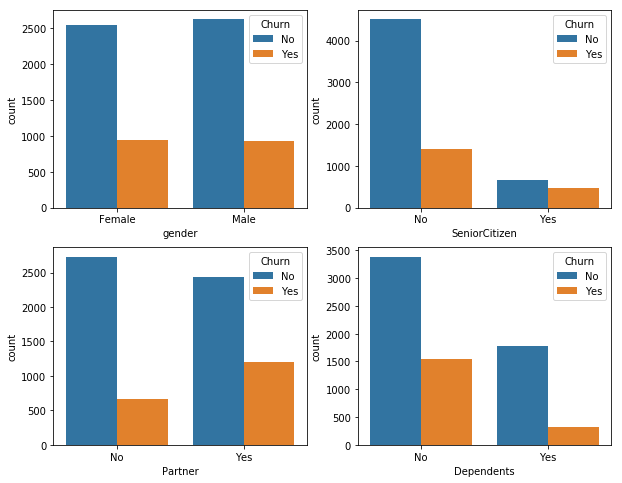

In [10]:
plt.figure(figsize=(10,8))
# gender vs Churn
plt.subplot(221)
a=sns.countplot(x='gender',data=df,hue='Churn')
a.set_xticklabels(('Female','Male'))
plt.legend(title='Churn',labels=['No','Yes'])

# Senior Citizen vs Churn
plt.subplot(222)
b=sns.countplot(x='SeniorCitizen',data=df,hue='Churn')
b.set_xticklabels(('No', 'Yes'))
plt.legend(title='Churn',labels=['No','Yes'])

# Partner vs Churn
plt.subplot(223)
c=sns.countplot(x='Partner',data=df,hue='Churn')
c.set_xticklabels(('No', 'Yes'))
plt.legend(title='Churn',labels=['No','Yes'])

# Dependents vs Churn
plt.subplot(224)
d=sns.countplot(x='Dependents',data=df,hue='Churn')
d.set_xticklabels(('No', 'Yes'))
plt.legend(title='Churn',labels=['No','Yes'])

1. Gender: it seems that a little more Male will not Churn comparing with Female. But, both gender have same chance to choose Churn. So, gender doesn't have much effect on Churn.
2. SeniorCitizen: much more younger customers will not churn comparing with those Senior Citizen. In addition, more younger customers wii choose churn comparing with Serior Citizens. It seems that the group of younger customers is not stable. Telecom will need to foucus more on younger customers than Senior Citizens. Besides, Younger customers are the marioty group.
3. Partner: no partner customers have more chance not to churn comparing with customers who have partners. Also, no partner customers has less chance to churn than customers who have paetners. So, no partner customers are better than customers who has partners. Telecom maybe need to put more focus on customers who has partners.
4. Dependents: much more Independents customers will not Churn. However, Much Indenpendents customers choose to churn. So, Independents customers are not stable. Telecome maybe need to put more focus on Independents customers. Besides, there are more independents customers than dependents customers.

#Check the relation between Churn and gender, age.

C:\Users\candy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


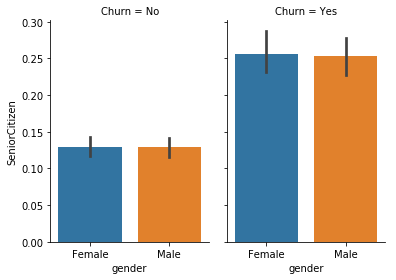

In [11]:
sns.catplot(x="gender", y="SeniorCitizen",col='Churn',data=df,kind='bar',height=4, aspect=.7)

It is obvious that almost same gender younger cusotmers didn't churn. However, more female Senior Citizen will be churn than man Senior Citizen.

#Check the relation between Churn and partner, dependents.

In [12]:
#Creat dummy variable for partner and dependents
df['Partner']=pd.get_dummies(df['Partner'],drop_first=True)
df['Dependents']=pd.get_dummies(df['Dependents'],drop_first=True)

C:\Users\candy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


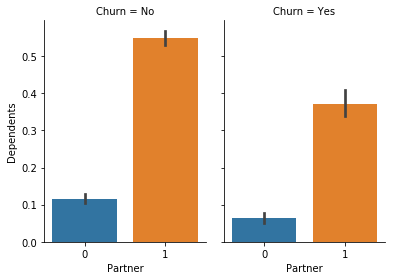

In [13]:
sns.catplot(x="Partner", y="Dependents",col='Churn',data=df,kind='bar',height=4, aspect=.7)

If the customer has the partner and Dependents, he/she will prefer no Churn. 

#2.Churn VS Service (phone Service, multiple lines, internet Service, online security, online                               backup, device protection, tech support, and streaming TV and movies)

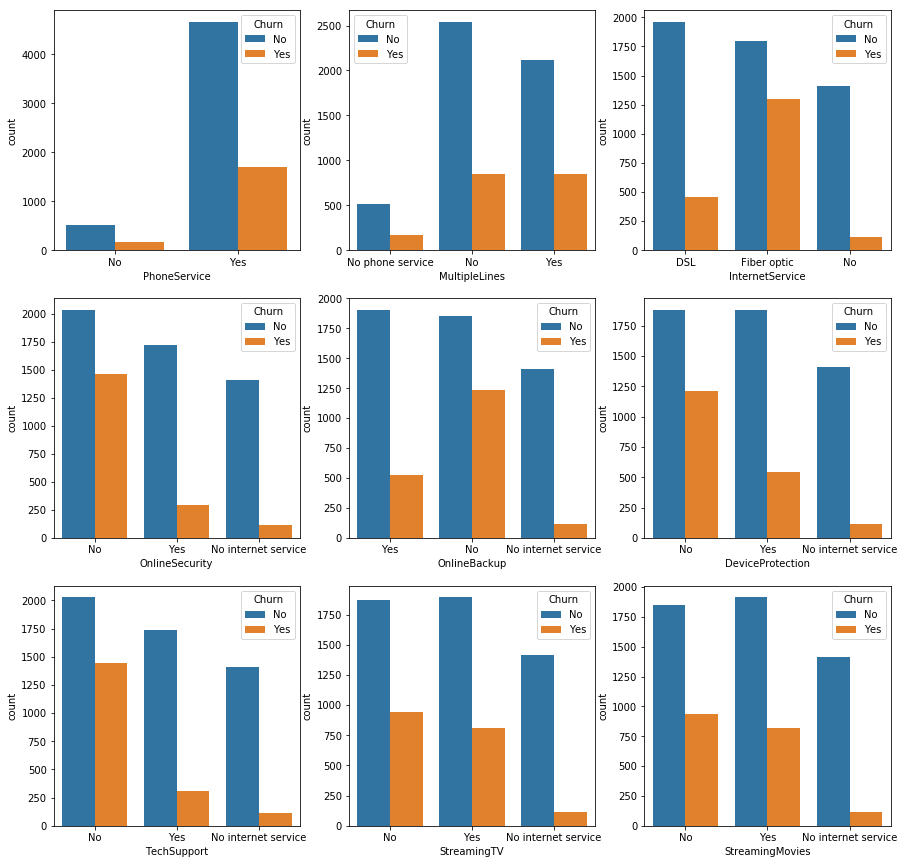

In [14]:
plt.figure(figsize=(15,15))
# Phone Service vs Churn
plt.subplot(331)
a=sns.countplot(x='PhoneService',data=df,hue='Churn')
a.set_xticklabels(('No','Yes'))
plt.legend(title='Churn',labels=['No','Yes'])

# MultipleLines vs Churn
plt.subplot(332)
b=sns.countplot(x='MultipleLines',data=df,hue='Churn')
b.set_xticklabels(('No phone service','No', 'Yes'))
plt.legend(title='Churn',labels=['No','Yes'])

# InternetService vs Churn
plt.subplot(333)
c=sns.countplot(x='InternetService',data=df,hue='Churn')
c.set_xticklabels(('DSL','Fiber optic','No'))
plt.legend(title='Churn',labels=['No','Yes'])

# OnlineSecurity vs Churn
plt.subplot(334)
d=sns.countplot(x='OnlineSecurity',data=df,hue='Churn')
d.set_xticklabels(('No', 'Yes','No internet service'))
plt.legend(title='Churn',labels=['No','Yes'])

# OnlineBackup vs Churn
plt.subplot(335)
e=sns.countplot(x='OnlineBackup',data=df,hue='Churn')
e.set_xticklabels(('Yes','No','No internet service'))
plt.legend(title='Churn',labels=['No','Yes'])

# DeviceProtection vs Churn
plt.subplot(336)
f=sns.countplot(x='DeviceProtection',data=df,hue='Churn')
f.set_xticklabels(('No', 'Yes','No internet service'))
plt.legend(title='Churn',labels=['No','Yes'])

# TechSupport vs Churn
plt.subplot(337)
g=sns.countplot(x='TechSupport',data=df,hue='Churn')
g.set_xticklabels(('No', 'Yes', 'No internet service'))
plt.legend(title='Churn',labels=['No','Yes'])

# StreamingTV vs Churn
plt.subplot(338)
h=sns.countplot(x='StreamingTV',data=df,hue='Churn')
h.set_xticklabels(('No', 'Yes','No internet service'))
plt.legend(title='Churn',labels=['No','Yes'])

# StreamingMovies and Churn
plt.subplot(339)
i=sns.countplot(x='StreamingMovies',data=df,hue='Churn')
i.set_xticklabels(('No', 'Yes','No internet service'))
plt.legend(title='Churn',labels=['No','Yes'])

1. PhoneService: Majority customers chose to use Phone Service. Also, more customers chose not to churn without considering choose phone service or not.
2. MultipleLines: overall, more customers didn't have multiplelines. Comparing with customers who have multiplelines, customers who didn't have multiplelines have less people to churn. However, both of them have same amount of customers will churn.
3. InternetService: Even Fiber optic customers didn't have most customers to choose no churn, this group of customers has the most people to churn. So, telecom need to put more attention on those who choose Fiber optic Interservice. On the opposite, DSL looks better. only a little customers churn.
4. OnlineSecurity: majority customers did't have online security. Also, in this group, almost half customers choose churn. So, telecom should put more attention on this group.
5. OnlineBackup: majority customers didn't have online backup. Besides, more customers chose churn comparing other two groups.
6. DeviceProtection: it looks same amount of customers have device Protection or not. But, if the customers didn't have device protection, he/she will have more chance to churn.
7. TechSupport: majority customers didn't have techSupport. Comparing with other two groups, no techsupport group has more chance to churn or not churn. So, telecom should put more focus on this group.
8. StreamingTv: customers who didn't have streaming Tv have almost the same amount as the group which has streaming TV. Beasides, both groups look have same chance to churn or not.
9. StreamingMovies: looks similar like Streaming TV.

#Relation between Churn and PhoneService, Multiplelines

                   No_Churn  Yes_Churn
No_PhoneServies         512        170
No_MultipleLines       2541        849
Yes_MultipleLines      2121        850


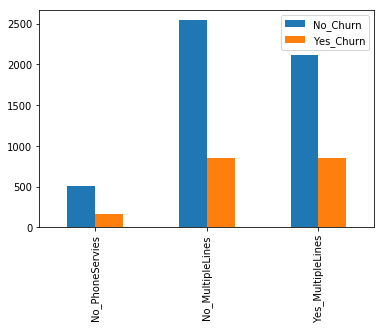

In [15]:
No_PS=df[df['PhoneService']=='No'].Churn.value_counts()
No_Multi=df[df['MultipleLines']=='No'].Churn.value_counts()
Yes_Multi=df[df['MultipleLines']=='Yes'].Churn.value_counts()
counts=np.array([[No_PS[0],No_PS[1]],[No_Multi[0],No_Multi[1]],[Yes_Multi[0],Yes_Multi[1]]])
Phone_Multi=pd.DataFrame(data=counts, index=['No_PhoneServies','No_MultipleLines','Yes_MultipleLines'], columns=['No_Churn','Yes_Churn'])
print(Phone_Multi)
Phone_Multi.plot.bar()

It is obvious that most of customers chose the phone service. In the No_Churn group, almost half customers chose single line. However, almost same amount customers chose Churn or not if they have Phone Service. 

#Relation between Churn and internet Service, online security, online backup, device protection, tech support, and streaming TV and movies

In [16]:
No_inter=df[df['InternetService']=='No'].Churn.value_counts()
DSL=df[df['InternetService']=='DSL'].Churn.value_counts()
Fiber=df[df['InternetService']=='Fiber optic'].Churn.value_counts()

No_OS=df[df['OnlineSecurity']=='No'].Churn.value_counts()
Yes_OS=df[df['OnlineSecurity']=='Yes'].Churn.value_counts()

No_OB=df[df['OnlineBackup']=='No'].Churn.value_counts()
Yes_OB=df[df['OnlineBackup']=='Yes'].Churn.value_counts()

No_DP=df[df['DeviceProtection']=='No'].Churn.value_counts()
Yes_DP=df[df['DeviceProtection']=='Yes'].Churn.value_counts()

No_TS=df[df['TechSupport']=='No'].Churn.value_counts()
Yes_TS=df[df['TechSupport']=='Yes'].Churn.value_counts()

No_ST=df[df['StreamingTV']=='No'].Churn.value_counts()
Yes_ST=df[df['StreamingTV']=='Yes'].Churn.value_counts()

No_SM=df[df['StreamingMovies']=='No'].Churn.value_counts()
Yes_SM=df[df['StreamingMovies']=='Yes'].Churn.value_counts()

                      No_Churn  Yes_Churn
No_InternetServies        1413        113
DSL_internet              1962        459
Fiber optic_internet      1799       1297
No_OnlineSecurity         2037       1461
Yes_OnlineSecurity        1724        295
No_OnlineBackup           1855       1233
Yes_OnlineBackup          1906        523
No_DeviceProtection       1884       1211
Yes_DeviceProtection      1877        545
No_TechSupport            2027       1446
Yes_TechSupport           1734        310
No_StreamingTV            1868        942
Yes_StreamingTV           1893        814
No_StreamingMovies        1847        938
Yes_StreamingMovies       1914        818


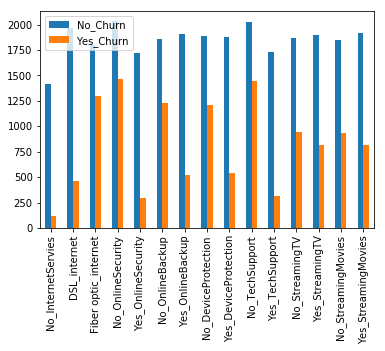

In [17]:
num=np.array([[No_inter[0],No_inter[1]],[DSL[0],DSL[1]],[Fiber[0],Fiber[1]],[No_OS[0],No_OS[1]],[Yes_OS[0],Yes_OS[1]],[No_OB[0],No_OB[1]],[Yes_OB[0],Yes_OB[1]],[No_DP[0],No_DP[1]],[Yes_DP[0],Yes_DP[1]],[No_TS[0],No_TS[1]],[Yes_TS[0],Yes_TS[1]],[No_ST[0],No_ST[1]],[Yes_ST[0],Yes_ST[1]],[No_SM[0],No_SM[1]],[Yes_SM[0],Yes_SM[1]]])
Internet=pd.DataFrame(data=num, index=['No_InternetServies','DSL_internet','Fiber optic_internet','No_OnlineSecurity', 'Yes_OnlineSecurity','No_OnlineBackup','Yes_OnlineBackup', 'No_DeviceProtection', 'Yes_DeviceProtection', 'No_TechSupport', 'Yes_TechSupport',
       'No_StreamingTV','Yes_StreamingTV', 'No_StreamingMovies','Yes_StreamingMovies'], columns=['No_Churn','Yes_Churn'])
print(Internet)
Internet.plot.bar()

Most customer didn't have techical support and online secruity. In addition, these two groups contained more customers who will churn or no_churn comparing with other groups. What is interesting is that customers had less chance to churn if they didn't join the internet service. 

#3.Churn VS Customer account information (how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges)

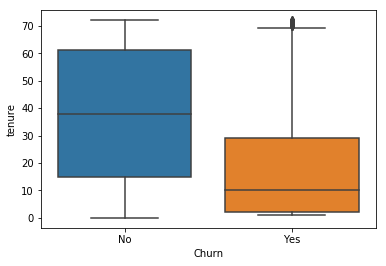

In [18]:
#Churn VS numerical varables
#Churn VS tenure
sns.boxplot(x='Churn',y='tenure',data=df)

For those customers who would not churn, the average month of contract is around 38. However, the average month of contract for the churn group is around 10. This maks sense since no Churn group will always stay, and the tenure will increase.

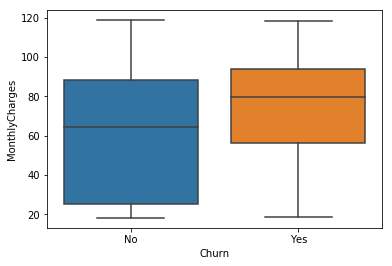

In [19]:
#Churn VS MonthlyCharges
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)

The average Monthly Charges of churn group is higher than the no churn group. I guess that customers prefer to choose cheaper service. If they felt they were charged too much, they would consider to churn and choose other telecoms. So, the Telecom need to pay attention on those customers who spent higher or equal than 80 as their monthly Charge. This group will be easy to churn.

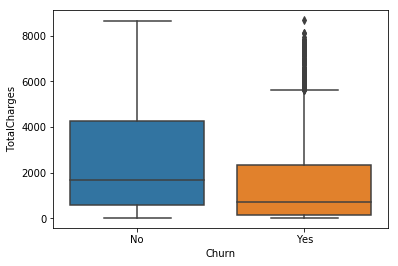

In [20]:
#Churn VS TotalCharges
sns.boxplot(x='Churn',y='TotalCharges',data=df)

The average of total Charges in the no churn group is much more higher than the churn group. This make sense since you stay longer, you need to spend more money. It is obviously that a lot of outliers in the churn group. This means even those customers spent a lot of money, they still choose to churn. For this type customers, maybe telecom need to find the reason why they leave.

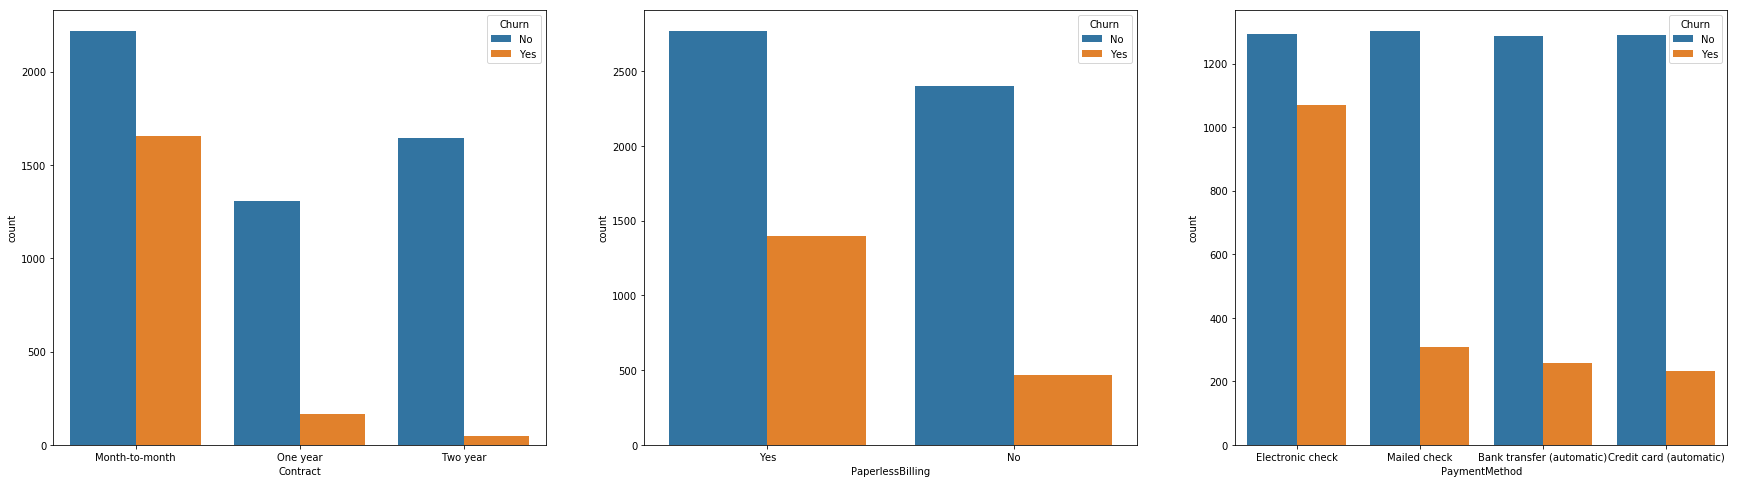

In [21]:
#Churn VS categorical variable
plt.figure(figsize=(30,8))
# Contract vs Churn
plt.subplot(131)
a=sns.countplot(x='Contract',data=df,hue='Churn')
a.set_xticklabels(('Month-to-month', 'One year', 'Two year'))
plt.legend(title='Churn',labels=['No','Yes'])

# PaperlessBilling vs Churn
plt.subplot(132)
b=sns.countplot(x='PaperlessBilling',data=df,hue='Churn')
b.set_xticklabels(('Yes', 'No'))
plt.legend(title='Churn',labels=['No','Yes'])

# PaymentMethod vs Churn
plt.subplot(133)
c=sns.countplot(x='PaymentMethod',data=df,hue='Churn')
c.set_xticklabels(('Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'))
plt.legend(title='Churn',labels=['No','Yes'])

1. Contract: Most customers chose month-to-month. Even more than half customers in this group didn't churn, still many customers chose churn. This group is not stable. Two-year group looks better because only a little customers would choose churn. 
2. PaperlessBilling: more customers chose paperless billing. But in paperless billing and paper billing group, customers who chose paperless billing would easier to churn.
3. PaymentMethod: it seems four different payment methods have same amount of customers who chose not churn. However, Most customers chose to churn if he/she used electronic check to pay.

In [22]:
#Data preprocessing
#Handle missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [23]:
#Use median to impute the missing values
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null uint8
Dependents          7043 non-null uint8
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), obje

In [25]:
df['customerID'].nunique()

7043

Since customerID is the unique number and have no meaningful for the prediction, I will not choose this variable to fit this model.

In [26]:
df.drop(columns='customerID',inplace=True)

In [27]:
#Change to dummy variables
df['gender']=pd.get_dummies(df['gender'],drop_first=True)
df['PhoneService']=pd.get_dummies(df['PhoneService'],drop_first=True)
df['PaperlessBilling']=pd.get_dummies(df['PaperlessBilling'],drop_first=True)
df['Churn']=pd.get_dummies(df['Churn'],drop_first=True)

In [28]:
#Use Label Encoder to handle category variable
le=LabelEncoder()
df['PaymentMethod']=le.fit(df['PaymentMethod']).transform(df['PaymentMethod'])
for i in df.columns[6:15]:
    df[i]=le.fit(df[i]).transform(df[i])

In [29]:
#Split original data into train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Churn'), df['Churn'], test_size=0.2, random_state=42)

#Classification
#SVM, RF, NaiveBayes and logisit Regression

In [37]:
# Logistic regression
lg = LogisticRegression().fit(X_train, y_train)
lg_pred=lg.predict(X_test)
lg_accuracy=accuracy_score(y_test,lg_pred)
print(lg_accuracy)
print(classification_report(y_test,lg_pred))

0.815471965933286
             precision    recall  f1-score   support

          0       0.86      0.89      0.88      1036
          1       0.67      0.60      0.63       373

avg / total       0.81      0.82      0.81      1409



In [32]:
# DecisionTreeClassifier
DT=DecisionTreeClassifier().fit(X_train, y_train)
DT_pred=DT.predict(X_test)
DT_accuracy=accuracy_score(y_test,DT_pred)
print(DT_accuracy)
print(classification_report(y_test,DT_pred))

0.7217885024840313
             precision    recall  f1-score   support

          0       0.81      0.81      0.81      1036
          1       0.48      0.49      0.48       373

avg / total       0.72      0.72      0.72      1409



In [33]:
#Random Forest
RF=RandomForestClassifier(random_state=42).fit(X_train, y_train)
RF_pred=RF.predict(X_test)
RF_accuracy=accuracy_score(y_test,RF_pred)
print(RF_accuracy)
print(classification_report(y_test,RF_pred))

0.7806955287437899
             precision    recall  f1-score   support

          0       0.82      0.90      0.86      1036
          1       0.62      0.45      0.52       373

avg / total       0.77      0.78      0.77      1409



In [34]:
# Naive Bayes
NB=GaussianNB().fit(X_train, y_train)
NB_pred=NB.predict(X_test)
NB_accuracy=accuracy_score(y_test,NB_pred)
print(NB_accuracy)
print(classification_report(y_test,NB_pred))

0.7565649396735273
             precision    recall  f1-score   support

          0       0.90      0.75      0.82      1036
          1       0.53      0.77      0.63       373

avg / total       0.80      0.76      0.77      1409



In [35]:
#linear SVM
SVM=svm.SVC(kernel='linear').fit(X_train, y_train)
SVM_pred=SVM.predict(X_test)
SVM_accuracy=accuracy_score(y_test,SVM_pred)
print(SVM_accuracy)
print(classification_report(y_test,SVM_pred))

0.7934705464868701
             precision    recall  f1-score   support

          0       0.82      0.92      0.87      1036
          1       0.66      0.45      0.54       373

avg / total       0.78      0.79      0.78      1409



Overall, Logistic regression can reach the highest accuracy.